## Task 6 - Prediction Using Decision Tree Algorithm

### Submitted by - Nisha Kumari

#### Algorithm - Decision Tree
#### Objective
#### > Create the Decision Tree classifier and visualize it graphically.
#### > The purpose is if we feed any new data to this classifier, it would be able to
#### predict the right class accordingly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import sklearn.datasets as datasets

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


#### Summarizing the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Checking for missing values if any

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

As we see, there is no missing value in the dataset

#### Data Visualization

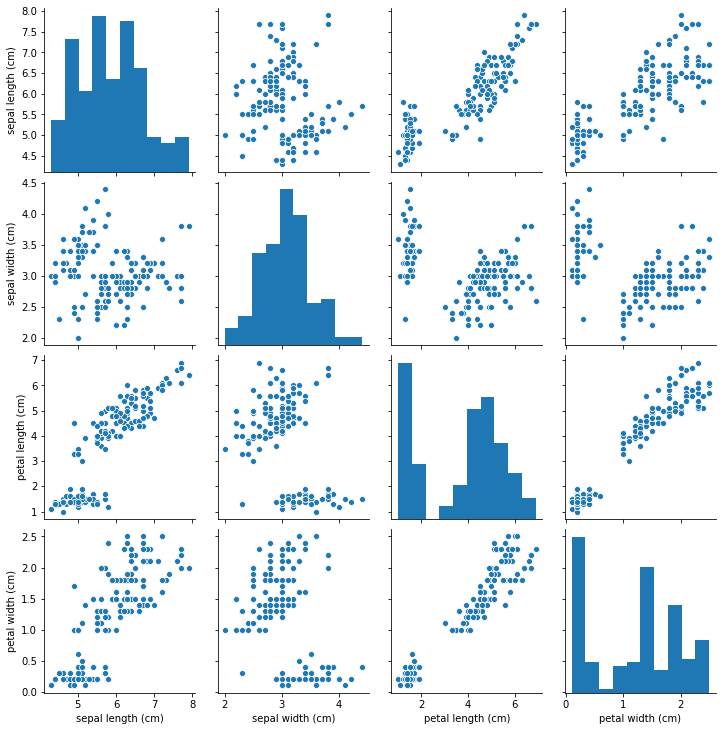

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [10]:
X = iris.data
Y = iris.target
Y = Y.astype(int)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

#### Splitting datasets into train and test

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [13]:
X_train.shape

(105, 4)

In [14]:
Y_train.shape

(105,)

In [15]:
X_test.shape

(45, 4)

In [16]:
Y_test.shape

(45,)

#### Defining the Decision Tree Algorithm

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [19]:
compare = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})

compare.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


#### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("confusion matrix :")
print(confusion_matrix(Y_test, y_pred))

confusion matrix :
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [21]:
print("Accuracy score :")
print(accuracy_score(Y_test, y_pred))

Accuracy score :
1.0


In [22]:
print("Classification Report :")
print(classification_report(Y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [23]:
print(list(zip(df.columns,model.feature_importances_)))

[('sepal length (cm)', 0.01911001911001911), ('sepal width (cm)', 0.01911001911001911), ('petal length (cm)', 0.40445656299314836), ('petal width (cm)', 0.5573233987868135)]


#### Visualization of the Decision Tree

In [24]:
from sklearn import tree
with open("model_DecisionTree.txt","w") as f:
    f=tree.export_graphviz(model,feature_names = df.columns[:],out_file = f)

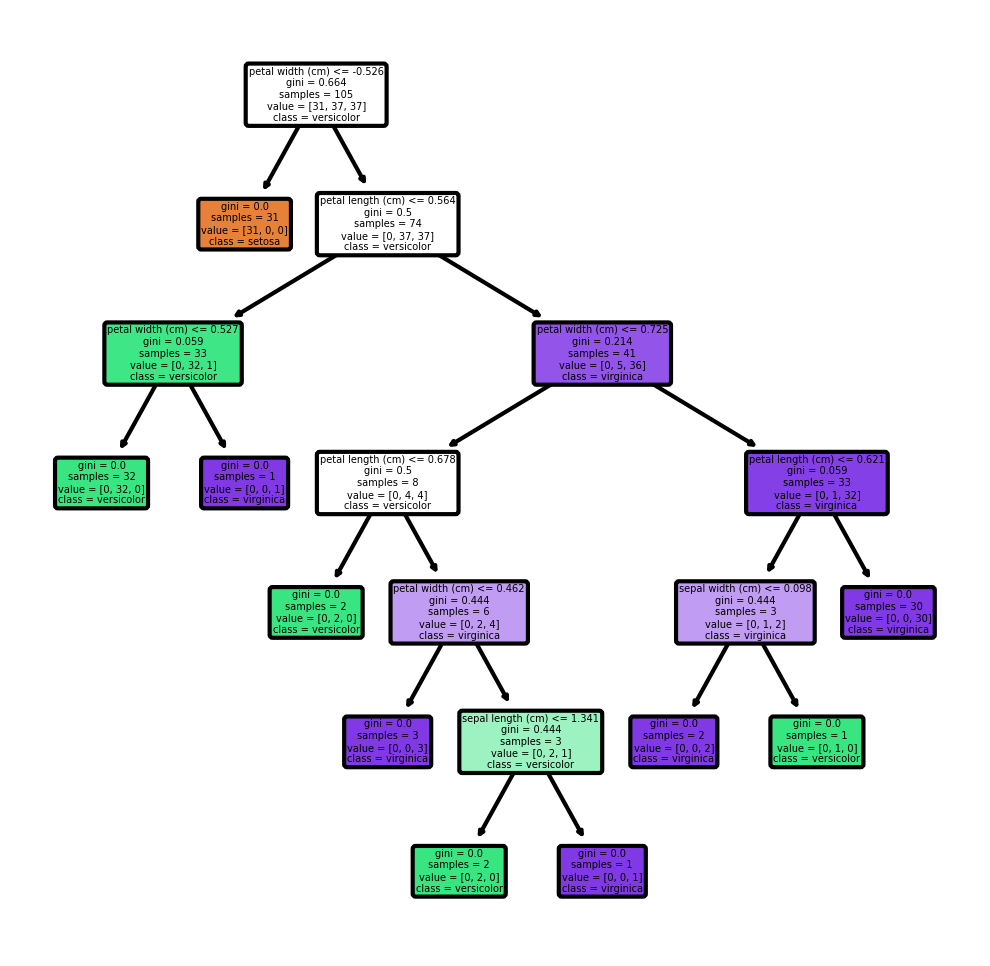

In [25]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True,rounded=True);